Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline
from IPython.display import Image

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

# Le pendule solide

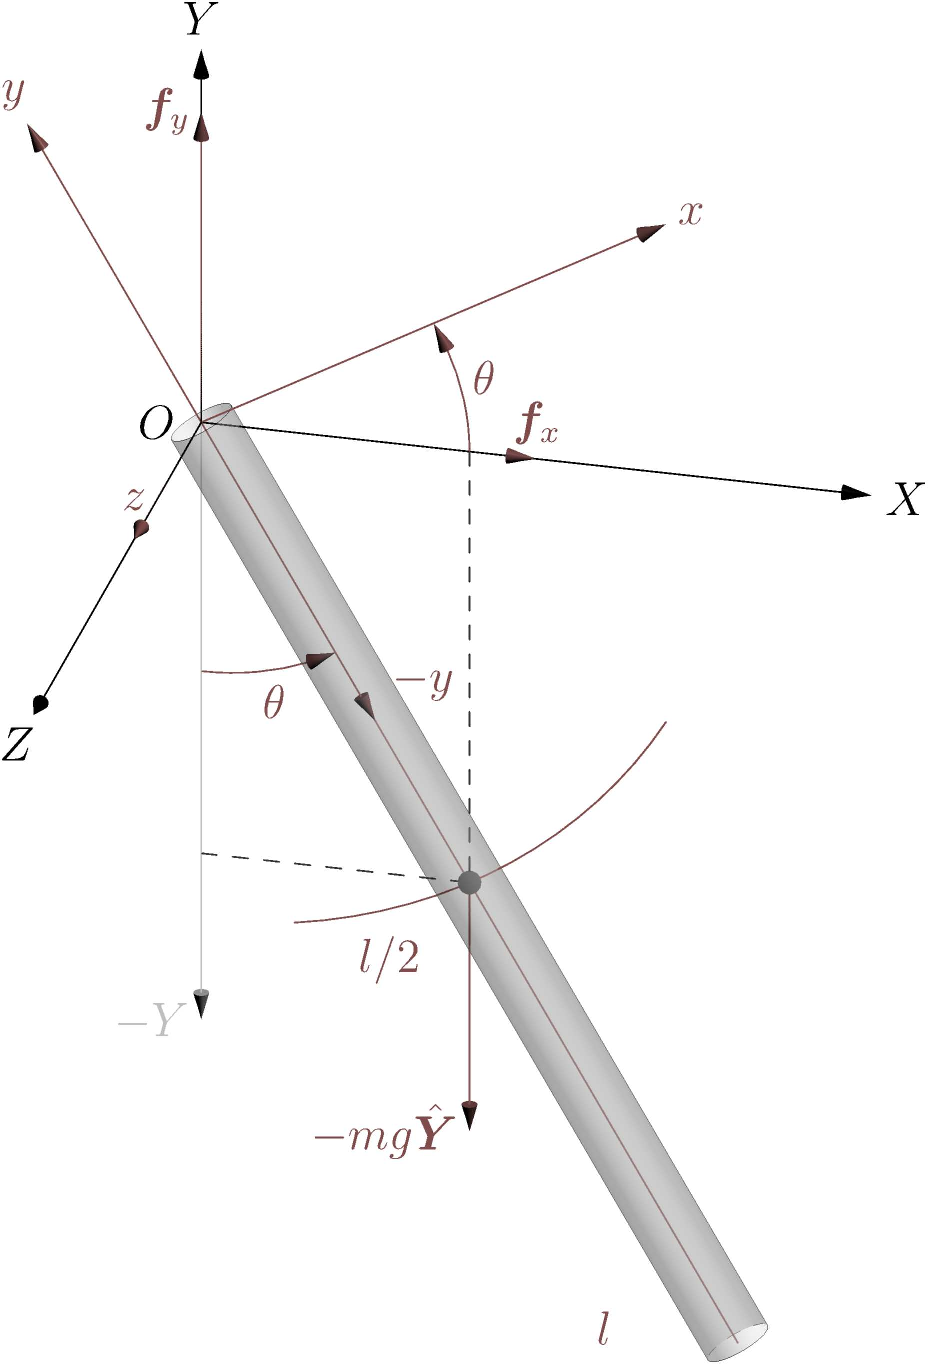

In [5]:
Image(filename='pendule_g0.png', width=300)

On étudie le mouvement pendulare d'une barre de longueur $l$ et de masse $m$ suspendue à une de ses extrémités. On veut aussi déterminer les forces de réaction au point de suspension (axe de rotation).

## Cinématique

Notez que le mouvement se fait dans le plan $XY$ (du repère fixe), il est donc naturel de choisir le repère fixe pour décrire ce système. Le centre de rotation est $O$. On note $\bm y$ l'axe de symétrie du pendule (repère mobile).

Repère mobile:
$$\hat{\bm x} = \cos\theta \hat{\bm X} + \sin\theta \hat{\bm Y}$$
$$-\hat{\bm y} = \sin\theta \hat{\bm X} - \cos\theta \hat{\bm Y}$$
$$\hat{\bm z} = \hat{\bm Z}$$

La position du centre de masse est
$$\bm R =  \frac{l}{2}\big(\sin\theta \hat{\bm X} - \cos\theta \hat{\bm Y} \big) =  -\frac{l}{2} \hat{\bm y}.$$
Le moment d'inertie (centre de masse) est
$$I_x^G = I_z^G = I = \frac{ml^2}{12}$$
et par rapport au point $O$ de rotation est
$$I_x = I_z = I_l = \frac{ml^2}{3}$$
La vitesse et l'accelération angulaires sont:
$$\bm \omega = \dot\theta \hat{\bm Z}, \quad \dot{\bm \omega} = \ddot\theta \hat{\bm Z}$$
La vitesse du centre de masse est
$$\bm V = \frac{\D \bm R}{\D t} =  \frac{l\dot\theta}{2}\big(\cos\theta \hat{\bm X} + \sin\theta \hat{\bm Y} \big) =  \frac{l\dot\theta}{2} \hat{\bm x}$$
et son accelération:
$$\dot{\bm V} = \frac{l}{2}\big[(\ddot{\theta}\cos\theta - \dot\theta^2 \sin\theta) \hat{\bm X} + (\ddot\theta \sin\theta + \dot\theta^2\cos\theta) \hat{\bm Y}\big] = -\frac{l \ddot{\theta}}{2}\hat{\bm x} + \frac{l \dot{\theta}^2}{2} \hat{\bm y}$$

## Moments et forces

La force totale agissant sur la barre est
$$\bm F = f_x \hat{\bm X} + (f_y - mg)\hat{\bm Y}$$
Le moment correspondant est
$$M_O = \bm R \times \bm F = -\frac{mgl}{2}\sin\theta \hat{\bm Z}$$

Le moment cinétique par rapport à l'axe de rotation $O$, est
$$\bm L = I_l \bm \Omega = \frac{ml^2}{3}\dot \theta \hat{\bm Z}$$

La variation du moment cinétique:
$$\dot{\bm L} = \frac{ml^2}{3}\ddot \theta \hat{\bm Z}$$
est aussi dirrigée selon l'axe fixe $Z$.

In [7]:
l, m = sy.symbols("l, M", positive = True)
theta = sy.symbols("theta", real = True)
theta_t = sy.symbols("theta_t", real = True)
theta_tt = sy.symbols("theta_tt", real = True)

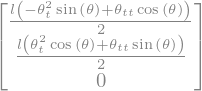

In [11]:
R = l/2 * sy.Matrix( [sy.sin(theta), -sy.cos(theta), 0] )
V = l*theta_t/2 * sy.Matrix( [sy.cos(theta), sy.sin(theta), 0] )
a = sy.simplify( theta_tt*sy.diff(V, theta_t) + theta_t*sy.diff(V, theta) )
a

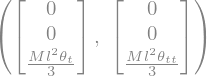

In [14]:
I = m*l**2/3
O = sy.Matrix( [0, 0, theta_t] )
L = sy.simplify( I*O )
Lt = sy.simplify( theta_tt*sy.diff(L, theta_t) )
L, Lt

## Newton et Euler

L'équation de Newton $\bm F = m \dot{\bm V}$ devient
\begin{align}
f_x &= \frac{ml}{2}\big(\ddot\theta \cos\theta - \dot\theta^2 \sin\theta \big)\\
f_y &= mg + \frac{ml}{2} \big(\ddot\theta \sin\theta + \dot\theta^2 \cos\theta \big)
\end{align}

En plus, on a l'équation d'Euler 
$$I_l \dot{\bm L} = M_O$$
(variation du moment cinétique):
$$\frac{ml^2}{3}\ddot\theta = -\frac{mgl}{2}\sin\theta \hat{\bm Z}$$
ce qui donne
$$\ddot\theta + \frac{3g}{2l}\sin\theta = 0$$
l'équation de la trajectoire du pendule. Une fois trouvée $\theta = \theta(t)$, on peut calculer la variation de contraintes $(f_x,f_y)$.

## Application numérique

In [8]:
from scipy.integrate import solve_ivp

In [9]:
def f(t,y):
    theta, omega = y[0], y[1]
    return np.array([omega, -(3/2)*np.sin(theta)])

In [10]:
NT = 100
t_i = 0
t_f = 4*np.pi
t = np.linspace(t_i,t_f,NT)
theta_0 = np.pi/3
omega_0 = 0
y0 = np.array([theta_0,omega_0])
sol = solve_ivp(f, t_span=(t_i,t_f), y0=y0, t_eval=t)

In [11]:
theta = sol.y[0]
omega = sol.y[1]
print(np.shape(sol.t))

(100,)


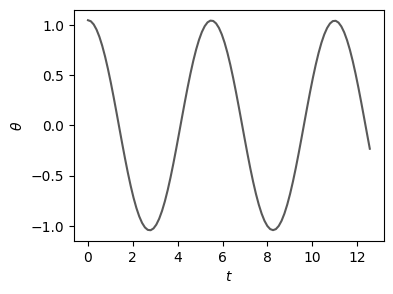

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t, theta, color = '0.35')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\theta$");

In [13]:
domega = -(3/2)*np.sin(theta)
f_x = 0.5*(domega*np.cos(theta) - omega**2*np.sin(theta))
f_y = 0.5*(domega*np.sin(theta) + omega**2*np.cos(theta))

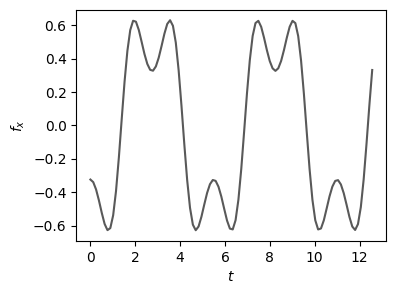

In [14]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t, f_x, color = '0.35')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$f_x$");

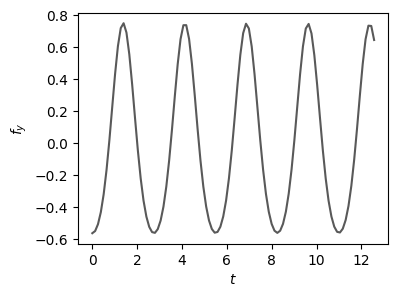

In [15]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t, f_y, color = '0.35')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$f_y$");

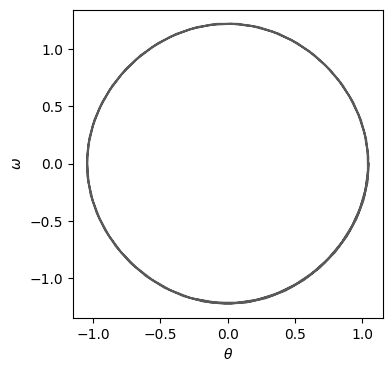

In [16]:
# Espace de phase
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(theta, omega, color = '0.35')
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\omega$");

## Calcul avec matrice de rotation

In [15]:
# matrices de rotation

phi, theta, psi = sy.symbols("phi, theta, psi", real=True)

def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

def XYZ():
    return sy.Matrix([1,0,0]), sy.Matrix([0,1,0]), sy.Matrix([0,0,1])

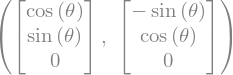

In [16]:
e1, e2, e3 = XYZ()
e_x = R_z(theta)*e1
e_y = R_z(theta)*e2

e_x, e_y

In [17]:
l, m, g = sy.symbols("ell, m, g", positive = True)
fx, fy = sy.symbols("f_x, f_y", real = True)
theta_t, theta_tt = sy.symbols("theta_t, theta_tt", real = True)

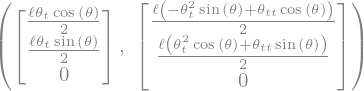

In [18]:
R_M = -l/2 * e_y
V = theta_t * sy.diff(R_M, theta)
a = sy.simplify( theta_tt * sy.diff(V, theta_t) + theta_t * sy.diff(V, theta) )
V, a

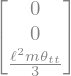

In [19]:
O = theta_t * e3
L = m*l**2/3 * O
L_t = theta_tt * sy.diff(L, theta_t) + O.cross(L)

L_t

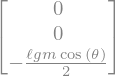

In [20]:
Mg = -m*g*l/2 * e_x.cross(e2)
Mg

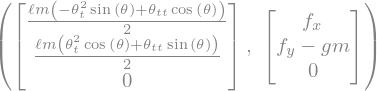

In [21]:
m*a, sy.Matrix( [fx, fy - m*g, 0] )

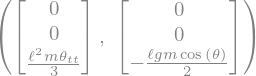

In [22]:
L_t, Mg